# Blending & Pasting Images

Blending images is done via the addWeighted function that uses both images and combines them
- To blend images, the simple function is used:
    new_pixel = (A * pixel_1) + (B * pixel_2) + Y

In [1]:
import cv2
import matplotlib.pyplot as plt

In [60]:
image_1 = cv2.imread('../data/image04.jpg') # import image via opencv
image_2 = cv2.imread('../data/image03.jpg') # import image via opencv
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB) # change to correct color mapping to RGB
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB) # change to correct color mapping to RGB

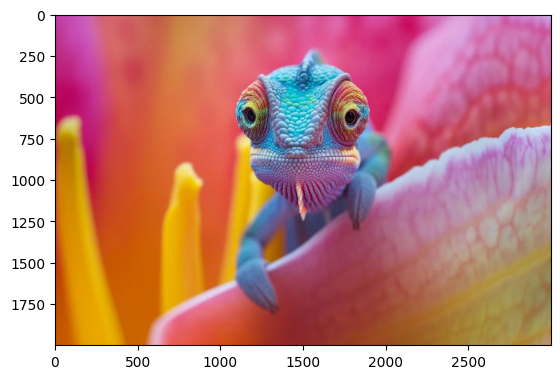

In [61]:
image_1.shape # get shape of image
image_1 = cv2.resize(image_1, (3000, 2000))
plt.imshow(image_1) # display image via matplotlib

(2000, 3000, 3)

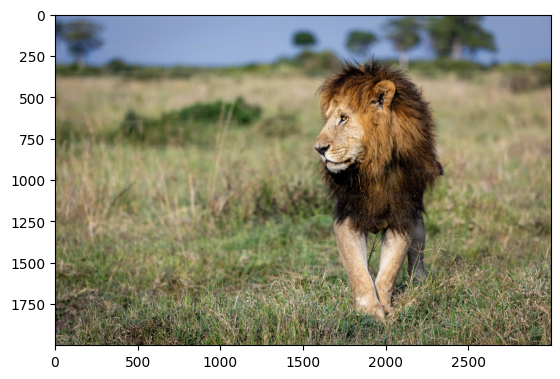

In [62]:
plt.imshow(image_2) # display image via matplotlib
image_2.shape

In [63]:
blended_image = cv2.addWeighted(src1=image_1, alpha=0.25, src2=image_2, beta=0.5, gamma=0)

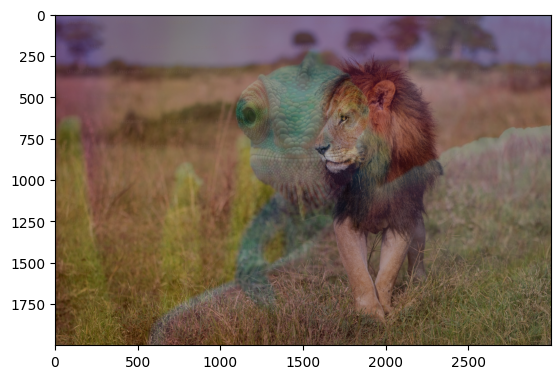

In [64]:
plt.imshow(blended_image)

In [72]:
# Overlaying smaller image on top of a larger image without blending
# Numpy reassignment
image_1 = cv2.imread('../data/image04.jpg') # import image via opencv
image_2 = cv2.imread('../data/image03.jpg') # import image via opencv
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB) # change to correct color mapping to RGB
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB) # change to correct color mapping to RGB

(720, 1280, 3)

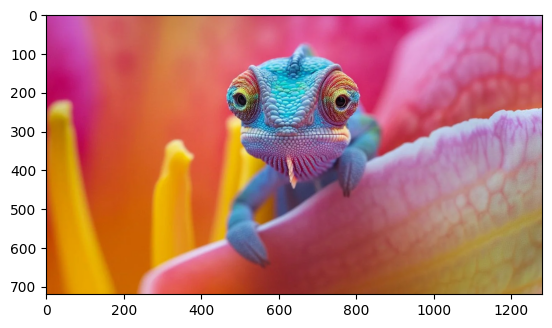

In [73]:
plt.imshow(image_1)
image_1.shape

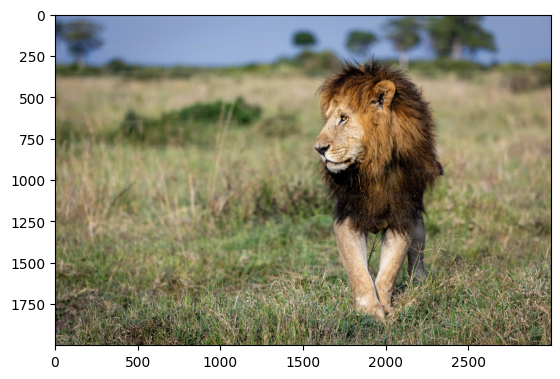

In [74]:
plt.imshow(image_2)

In [75]:
large_image = image_2
small_image = image_1

In [77]:
x_offset = 0
y_offset = 0
x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]
small_image.shape

(720, 1280, 3)

In [80]:
large_image[y_offset:y_end, x_offset:x_end] = small_image
large_image.shape

(2000, 3000, 3)

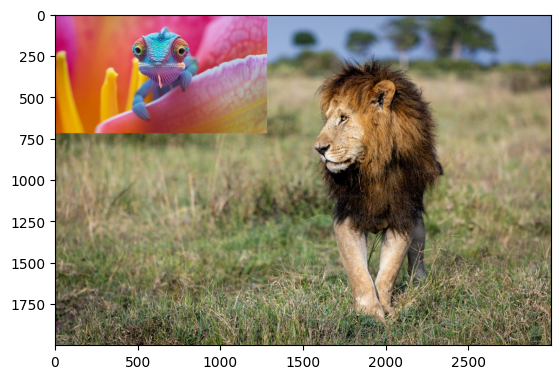

In [81]:
plt.imshow(large_image)

In OpenCV, masks are binary images (or arrays) that determine which pixels in an image should be processed and which should be ignored. 
They're extremely useful for isolating specific regions of interest in an image.

In [174]:
img1 = cv2.imread('../data/image04.jpg') # import image via opencv
img2 = cv2.imread('../data/image03.jpg') # import image via opencv
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # change to correct color mapping to RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # change to correct color mapping to RGB

In [167]:
x_offset = 3000 - 1000
y_offset = 2000 - 1000

In [168]:
rows, cols, channels = image_1.shape

In [169]:
rows

720

In [170]:
cols

1280

In [171]:
channels

3

In [175]:
roi = img2[y_offset:2000, x_offset:3000] # region of interest == bottom corner of img2

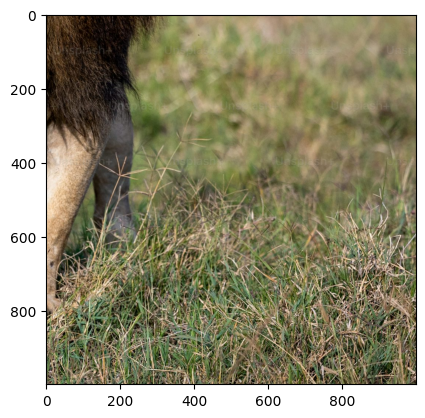

In [176]:
plt.imshow(roi)

In [179]:
# the mask allows us to only grab the wanted portion of the image being placed on img2
img1gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

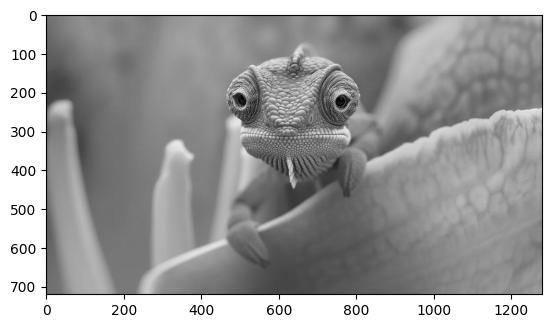

In [180]:
plt.imshow(img1gray, cmap='gray')

(720, 1280)

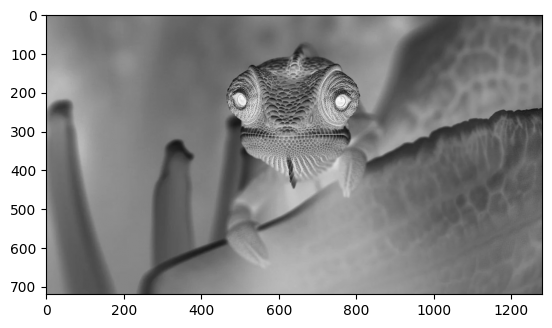

In [157]:
mask_inv = cv2.bitwise_not(img1gray)
plt.imshow(mask_inv, cmap='gray')
mask_inv.shape # no longer shows color channels

In [142]:
# insert color channels
import numpy as np
white_background = np.full(image_1.shape,255,dtype=np.uint8)

(720, 1280, 3)

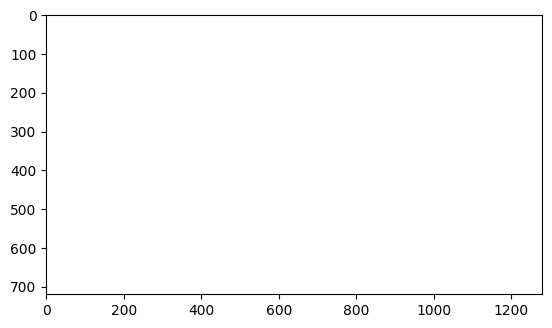

In [146]:
plt.imshow(white_background)
white_background.shape

In [147]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
bk.shape

(720, 1280, 3)

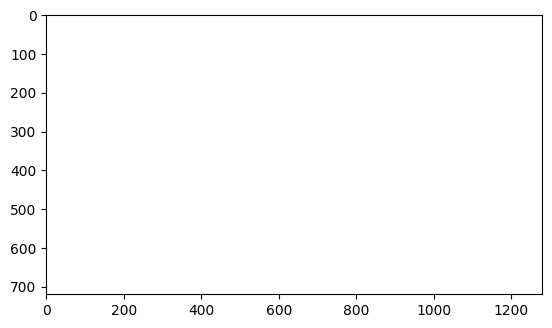

In [ ]:
plt.imshow(bk)

In [158]:
fg = cv2.bitwise_or(image_1, image_1, mask=mask_inv)

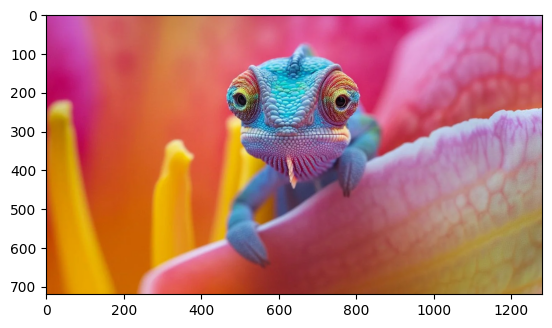

In [159]:
plt.imshow(fg)